# Programming in Bioinformatics and Systems Biology
# Master in Omics Data Analysis and Systems Biology
# Course 2023/2024
## 2D protein folding

## Exercise

The following is an implemented *Simulating Annealing* algorithm to solve the 2D folding problem as an optimisation problem, analyse the code:

In [17]:
import random
-90 + random.randint(0,2) * 180

-90

In [18]:
import random

from math import e

def simulating_annealing(protein, tInit = 100, factor = 0.95, 
                         nCoolings = 100, nIters = 100):
    
    temperature = tInit
    currentState = (protein, 'I'+'E'*(len(protein)-1))
    currentScore = get_score(get_spatial_dic(*currentState))
    bestState = currentState
    bestScore = currentScore
    
    for i in range(0, nCoolings):
        print('Temperature ', temperature, ' Best score: ', bestScore)
        
        for j in range(0, nIters):
            candidate = fold(currentState[1],
                             random.randint(1, len(protein)),
                             -90 + random.randint(0,1) * 180)
            
            dic = get_spatial_dic(protein,candidate)
            
            while (len(dic) == 0):
                candidate = fold(currentState[1],
                             random.randint(1, len(protein)),
                             -90 + random.randint(0,1) * 180)
                
                dic = get_spatial_dic(protein, candidate)
                
            candidateScore = get_score(dic)
            
            scoreDiff = candidateScore - currentScore
            
            if scoreDiff < 0:
                candidateProb = 1.0
            else:
                candidateProb = e**(- scoreDiff / temperature)
            if random.random() < candidateProb:
                currentState = (protein,candidate)
                
                currentScore = candidateScore
                
                if currentScore < bestScore:
                    bestState = currentState
                    
                    bestScore = currentScore
                    
        temperature*= factor
        
    return bestState    

In [27]:
# The following sequence corresponds to the olfactory receptor of Homo sapiens, being a transmembrane protein
# Accession Number Uniprot: Q8NHC7

Q8NHC7 = 'MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV'

result = simulating_annealing(Q8NHC7, 95, 0.95, 200, 200)
result

# By lowering the initial temperature from 100 to 90 I managed to lower the score, but by leaving it at an intermediate point 
# (95) I achieved an even better score

Temperature  95  Best score:  5233.380000000001
Temperature  90.25  Best score:  3920.800000000003
Temperature  85.7375  Best score:  3803.2100000000028
Temperature  81.45062499999999  Best score:  3803.2100000000028
Temperature  77.37809374999999  Best score:  3803.2100000000028
Temperature  73.50918906249998  Best score:  3803.2100000000028
Temperature  69.83372960937498  Best score:  3803.2100000000028
Temperature  66.34204312890623  Best score:  3803.2100000000028
Temperature  63.02494097246091  Best score:  3803.2100000000028
Temperature  59.87369392383786  Best score:  3803.2100000000028
Temperature  56.880009227645964  Best score:  3803.2100000000028
Temperature  54.03600876626366  Best score:  3803.2100000000028
Temperature  51.33420832795048  Best score:  3279.7700000000004
Temperature  48.76749791155295  Best score:  3278.6500000000015
Temperature  46.3291230159753  Best score:  3233.2600000000016
Temperature  44.012666865176534  Best score:  3233.2600000000016
Temperature  4

Temperature  0.13376579723584545  Best score:  1865.7799999999997
Temperature  0.12707750737405316  Best score:  1865.7799999999997
Temperature  0.1207236320053505  Best score:  1865.7799999999997
Temperature  0.11468745040508296  Best score:  1865.7799999999997
Temperature  0.10895307788482882  Best score:  1865.7799999999997
Temperature  0.10350542399058738  Best score:  1865.7799999999997
Temperature  0.098330152791058  Best score:  1865.7799999999997
Temperature  0.09341364515150509  Best score:  1865.7799999999997
Temperature  0.08874296289392983  Best score:  1865.7799999999997
Temperature  0.08430581474923333  Best score:  1865.7799999999997
Temperature  0.08009052401177166  Best score:  1865.7799999999997
Temperature  0.07608599781118308  Best score:  1865.7799999999997
Temperature  0.07228169792062393  Best score:  1865.7799999999997
Temperature  0.06866761302459273  Best score:  1865.7799999999997
Temperature  0.0652342323733631  Best score:  1865.7799999999997
Temperature  0

('MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV',
 'ISENNENWWSWWWWSSWWWSEEEESENNWNEESSSESENNESSSWSEEESESSSWNWWSWNNNWNNWWSESWSSENESSSWSWNNWSSWNNWSSWSEEESESSENESSENNNWNNESENEEEESWSESSWWWSWSESWWNWSSWNNNWWNNWSSWNWNNWNWWNENENWWSWSWNNWNENESEEEEENNWNENNNWSWSSSSWWNWWNENNWSWNNENWWNNEEEESWSSESENNNNNWWNEENWWWSSWWNWSSWSWNWSSSSENNESSSWWWNWNENNNNNESEENWNENNEESENNESSEEEESSSSEE')

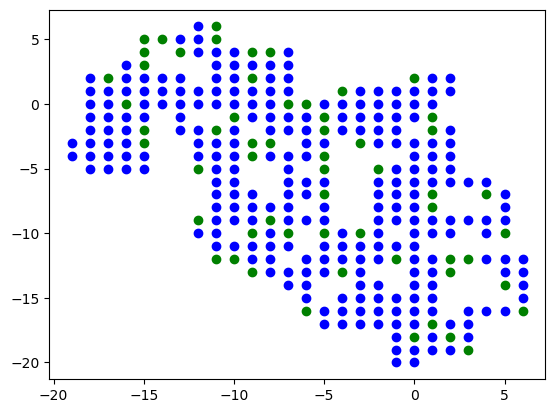

In [28]:
# The following code makes a representation of the structure of the olfactory receptor of Homo sapiens

from matplotlib import pyplot

dic = get_spatial_dic(*result)

for (a,b) in dic:
    if is_hydrophobic(dic[(a,b)]):
        pyplot.plot(a,b,'bo')
    else:
        pyplot.plot(a,b,'go')
        
# By lowering the initial temperature, it seems that there has been an improvement in terms of the positions occupied by the 
# hydrophobic amino acids (green dots) as the structure now contains a higher content of these in the central holes, i.e. they
# are more sheltered from water and makes more sense with the structure that should make up the protein in reality


You are asked to:

* Modify the parameters tInit, factor, nCoolings and nIters to try to improve the results.

* Download from UNIPROT interesting protein sequences such as olfactory receptors from different species and train the 2D structure, make graphs and comment if the results make any sense.

* Modify the above graph code so that it paints a different colour depending on the ΔG value of the corresponding amino acid. Try to implement a colour gradient.

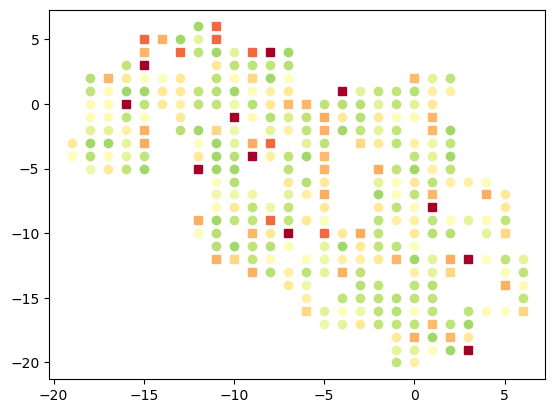

In [30]:
from matplotlib import pyplot, cm
from matplotlib import colormaps

dic = get_spatial_dic(*result)

cmap = colormaps.get_cmap('RdYlGn') # I create a Red-Yellow-Green colour map

for (a, b) in dic: # This loop is for plotting the dots in a colour gradient
    aa = dic[(a, b)]
    deltaG = aa_deltaG[aa]

    color = cmap((deltaG + 7.5) / 15.0)  # I normalise the value of ΔG to the range [0, 1], to improve visual consistency
    marker = 'o' if is_hydrophobic(aa) else 's'  # I use ‘o’ (circle) for hydrophobic aas, and ‘s’ (square) for hydrophilic aas

    pyplot.plot(a, b, marker, color=color)

pyplot.show()

In [31]:
# The following sequence corresponds to the olfactory receptor of Mus musculus, being a transmembrane protein
# Accession Number Uniprot: Q8VFT4

Q8VFT4 = 'MEPANDTTVTEFILTGLSQTREVQLVLFVIFLSFYLFILPVNILIICTIRLDSHLSSPMYFLLANLAFLDIWYSSITAPKMLVDFFVERKIISFGGCIAQLFFLHFVGASEMFLLTVMAFDRYAAICRPLHYATIMNRRLCCILVALSWTGGFVHSIIQVALIVRLPFCGPNELDNYFCDITQVVRIACANTFLEEMVMIFSSGLISVVCFIALLMSYAFLLTMLKKHSSSGESTSRAISTCYSHITIVVLMFGPSIYIYARPFDSFSLDKVVSVFHTVIFPLLNPIIYTLRNKEVKAAMRKLVNRYIFCKEK'

result1 = simulating_annealing(Q8VFT4, 95, 0.95, 200, 200)
result1

# It seems to be proven again in this protein that lowering the initial temperature to 95 results in a lower and therefore 
# better score

# This one has a lower score than the human one with the same parameters

Temperature  95  Best score:  5056.980000000004
Temperature  90.25  Best score:  4410.8700000000035
Temperature  85.7375  Best score:  3770.8900000000026
Temperature  81.45062499999999  Best score:  3770.8900000000026
Temperature  77.37809374999999  Best score:  3770.8900000000026
Temperature  73.50918906249998  Best score:  3661.330000000002
Temperature  69.83372960937498  Best score:  3480.490000000001
Temperature  66.34204312890623  Best score:  3480.490000000001
Temperature  63.02494097246091  Best score:  3480.490000000001
Temperature  59.87369392383786  Best score:  3480.490000000001
Temperature  56.880009227645964  Best score:  3480.490000000001
Temperature  54.03600876626366  Best score:  3454.01
Temperature  51.33420832795048  Best score:  3454.01
Temperature  48.76749791155295  Best score:  3029.8500000000004
Temperature  46.3291230159753  Best score:  2906.040000000001
Temperature  44.012666865176534  Best score:  2906.040000000001
Temperature  41.812033521917705  Best score

Temperature  0.1207236320053505  Best score:  1450.8799999999999
Temperature  0.11468745040508296  Best score:  1450.8799999999999
Temperature  0.10895307788482882  Best score:  1450.8799999999999
Temperature  0.10350542399058738  Best score:  1450.8799999999999
Temperature  0.098330152791058  Best score:  1450.8799999999999
Temperature  0.09341364515150509  Best score:  1450.8799999999999
Temperature  0.08874296289392983  Best score:  1450.8799999999999
Temperature  0.08430581474923333  Best score:  1450.8799999999999
Temperature  0.08009052401177166  Best score:  1450.8799999999999
Temperature  0.07608599781118308  Best score:  1450.8799999999999
Temperature  0.07228169792062393  Best score:  1450.8799999999999
Temperature  0.06866761302459273  Best score:  1450.8799999999999
Temperature  0.0652342323733631  Best score:  1450.8799999999999
Temperature  0.061972520754694935  Best score:  1450.8799999999999
Temperature  0.05887389471696019  Best score:  1450.8799999999999
Temperature  

('MEPANDTTVTEFILTGLSQTREVQLVLFVIFLSFYLFILPVNILIICTIRLDSHLSSPMYFLLANLAFLDIWYSSITAPKMLVDFFVERKIISFGGCIAQLFFLHFVGASEMFLLTVMAFDRYAAICRPLHYATIMNRRLCCILVALSWTGGFVHSIIQVALIVRLPFCGPNELDNYFCDITQVVRIACANTFLEEMVMIFSSGLISVVCFIALLMSYAFLLTMLKKHSSSGESTSRAISTCYSHITIVVLMFGPSIYIYARPFDSFSLDKVVSVFHTVIFPLLNPIIYTLRNKEVKAAMRKLVNRYIFCKEK',
 'IWWWNNESEEESSEESENNNENWWSWNWWWNENWWWSWNNEEEEESSENNNWWWWWNNNWSSSWWWNEENWWWWSESSWNWNWSSWSESWWNWWNNNENWNENWNEESSSEEENWWNENESEENWNEESSSEENWNNNNESEEEEEESSSWWNNWWWWSEEESSEESENESSENENWNWNNNNWWNEEESENNWNWSWWWNEENWNEESENENNWSWWWWSSWNWNWNEEENESEENNESENENESSWSEEENWNNEESSSSENENWNEENWNWWWWWNNESEENWNWNWSWNNEEESESENESSWSEESENN')

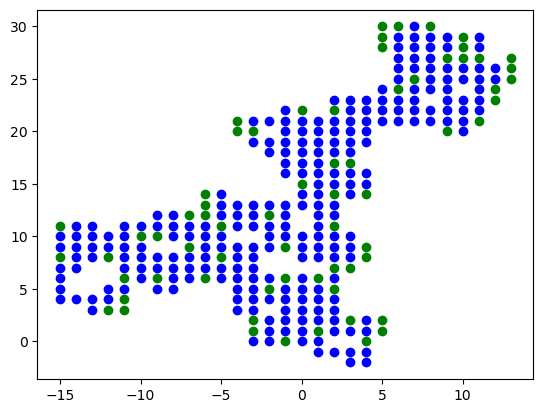

In [32]:
# The following code makes a representation of the structure of the olfactory receptor of Mus musculus

from matplotlib import pyplot
dic = get_spatial_dic(*result1)
for (a,b) in dic:
    if is_hydrophobic(dic[(a,b)]):
        pyplot.plot(a,b,'bo')
    else:
        pyplot.plot(a,b,'go')
        
# This improved score is also reflected in the final structure, although in this case the amino acid distribution appears to 
# be worse

In [31]:
# The following sequence corresponds to the olfactory receptor of Macaca mulatta, a transmembrane protein
# Accession Number Uniprot: F6ZU41

F6ZU41 = 'MGSGTRHWKRAIKHPEVLRIPQYPGEGGWDCQCDLTLSSHPSSVPAMSSCNFTHATFVLIGIPGLEKAHFWVGFPLLSMYVVAVFGNCIVVFIVRTERNLHSPMYLFLCMLAAIDLALSTSTMPKILALFWFDSREISFEACLTQMFFIHALSAIESTILLAMAFDRYVAICHPLRHAAVLNNTVTAQIGIVAVVRGSLFFFPLPLLIKRLAFCHSNVLSHSYCVHQDVMKLAYADTLPNVVYGLTAILLVMGVDVMFISLSYFLIIRTVLQLPSKSERAKAFGTCVSHIGVVLAFYVPLIGLSVVHRFGNSLHPIVRVVMGDIYLLLPPVINPIIYGAKTKQIRTRVLAMFKISCDKDFQAVGGK'

result2 = simulating_annealing(F6ZU41, 100, 0.95, 200, 200)
result2

Temperature  100  Best score:  5813.220000000003
Temperature  95.0  Best score:  4776.220000000002
Temperature  90.25  Best score:  4377.890000000002
Temperature  85.7375  Best score:  4377.890000000002
Temperature  81.45062499999999  Best score:  4322.230000000003
Temperature  77.37809374999999  Best score:  4322.230000000003
Temperature  73.50918906249998  Best score:  4322.230000000003
Temperature  69.83372960937498  Best score:  4322.230000000003
Temperature  66.34204312890623  Best score:  4322.230000000003
Temperature  63.02494097246091  Best score:  4138.910000000002
Temperature  59.87369392383786  Best score:  4138.910000000002
Temperature  56.880009227645964  Best score:  4138.910000000002
Temperature  54.03600876626366  Best score:  4091.8100000000004
Temperature  51.33420832795048  Best score:  3890.309999999999
Temperature  48.76749791155295  Best score:  3813.26
Temperature  46.3291230159753  Best score:  3813.26
Temperature  44.012666865176534  Best score:  3813.26
Temper

Temperature  0.1207236320053505  Best score:  2021.4200000000003
Temperature  0.11468745040508296  Best score:  2021.4200000000003
Temperature  0.10895307788482882  Best score:  2021.4200000000003
Temperature  0.10350542399058738  Best score:  2021.4200000000003
Temperature  0.098330152791058  Best score:  2021.4200000000003
Temperature  0.09341364515150509  Best score:  2021.4200000000003
Temperature  0.08874296289392983  Best score:  2021.4200000000003
Temperature  0.08430581474923333  Best score:  2021.4200000000003
Temperature  0.08009052401177166  Best score:  2021.4200000000003
Temperature  0.07608599781118308  Best score:  2021.4200000000003
Temperature  0.07228169792062393  Best score:  2021.4200000000003
Temperature  0.06866761302459273  Best score:  2021.4200000000003
Temperature  0.0652342323733631  Best score:  2021.4200000000003
Temperature  0.061972520754694935  Best score:  2021.4200000000003
Temperature  0.05887389471696019  Best score:  2021.4200000000003
Temperature  

('MGSGTRHWKRAIKHPEVLRIPQYPGEGGWDCQCDLTLSSHPSSVPAMSSCNFTHATFVLIGIPGLEKAHFWVGFPLLSMYVVAVFGNCIVVFIVRTERNLHSPMYLFLCMLAAIDLALSTSTMPKILALFWFDSREISFEACLTQMFFIHALSAIESTILLAMAFDRYVAICHPLRHAAVLNNTVTAQIGIVAVVRGSLFFFPLPLLIKRLAFCHSNVLSHSYCVHQDVMKLAYADTLPNVVYGLTAILLVMGVDVMFISLSYFLIIRTVLQLPSKSERAKAFGTCVSHIGVVLAFYVPLIGLSVVHRFGNSLHPIVRVVMGDIYLLLPPVINPIIYGAKTKQIRTRVLAMFKISCDKDFQAVGGK',
 'IWWSESWWNWSSWWWNWSWNWNENWNNESENENNESENEEESSENESENNENWNENESEENESSWWWSESSWNWSSWSESWWSESSEEENWWNEEESENNNNENNWSWNNEENNNEESWSESENNESENNWNWNEESENNWWWNENNWSWSSSSWWWNEENWWWSSWNNWSWWSSWNNNENENWNENWWSSSWNNNWNEENNNESSSENENWNENWNEENWWWSSWWNENNEENWWWNEENWNWWSSSSESWWSESWSSWNNWSSWSSEENESSSWWSSSSWNWNWNENWWSSWWNNNNEESENNNNNEENWWNENNESSESENNENWNNNENNWSWSSWSWWNNENENENEEESSEEESESSENE')

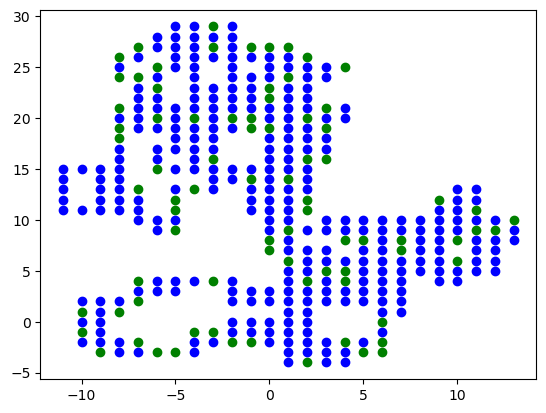

In [35]:
# The following code makes a representation of the structure of the olfactory receptor of Macaca mulatta
from matplotlib import pyplot

dic = get_spatial_dic(*result2)

for (a, b) in dic:
    if is_hydrophobic(dic[(a, b)]):
        pyplot.plot(a, b, 'bo')
    else:
        pyplot.plot(a, b, 'go')